In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [23]:
file_path = '/content/drive/MyDrive/PRODIGY_DS_INTERNSHIP_JUNE-JULY/PROGIDY_DS_TASK_03/bank_marketing.csv'
df = pd.read_csv(file_path, delimiter=',', quotechar='"', quoting=0, skipinitialspace=True)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [24]:
df.fillna(df.mode().iloc[0], inplace=True)

In [25]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [27]:
X = df.drop('y', axis=1)
y = df['y']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [30]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = clf.predict(X_test)

In [42]:
new_data = {
    'age': [68],
    'job': ['retired'],
    'marital': ['divorced'],
    'education': ['secondary'],
    'default': ['no'],
    'balance': [4189],
    'housing': ['no'],
    'loan': ['no'],
    'contact': ['telephone'],
    'day': [14],
    'month': ['jul'],
    'duration': [897],
    'campaign': [2],
    'pdays': [-1],
    'previous': [0],
    'poutcome': ['unknown']
}
new_df = pd.DataFrame(new_data)
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = le.fit_transform(new_df[col])
new_df = new_df[X.columns]
new_predictions = clf.predict(new_df)
print("Predicted values:", new_predictions)

Predicted values: [1]


In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1620
           1       0.29      0.34      0.32       189

    accuracy                           0.85      1809
   macro avg       0.61      0.62      0.61      1809
weighted avg       0.86      0.85      0.85      1809

Confusion Matrix:
 [[1467  153]
 [ 125   64]]


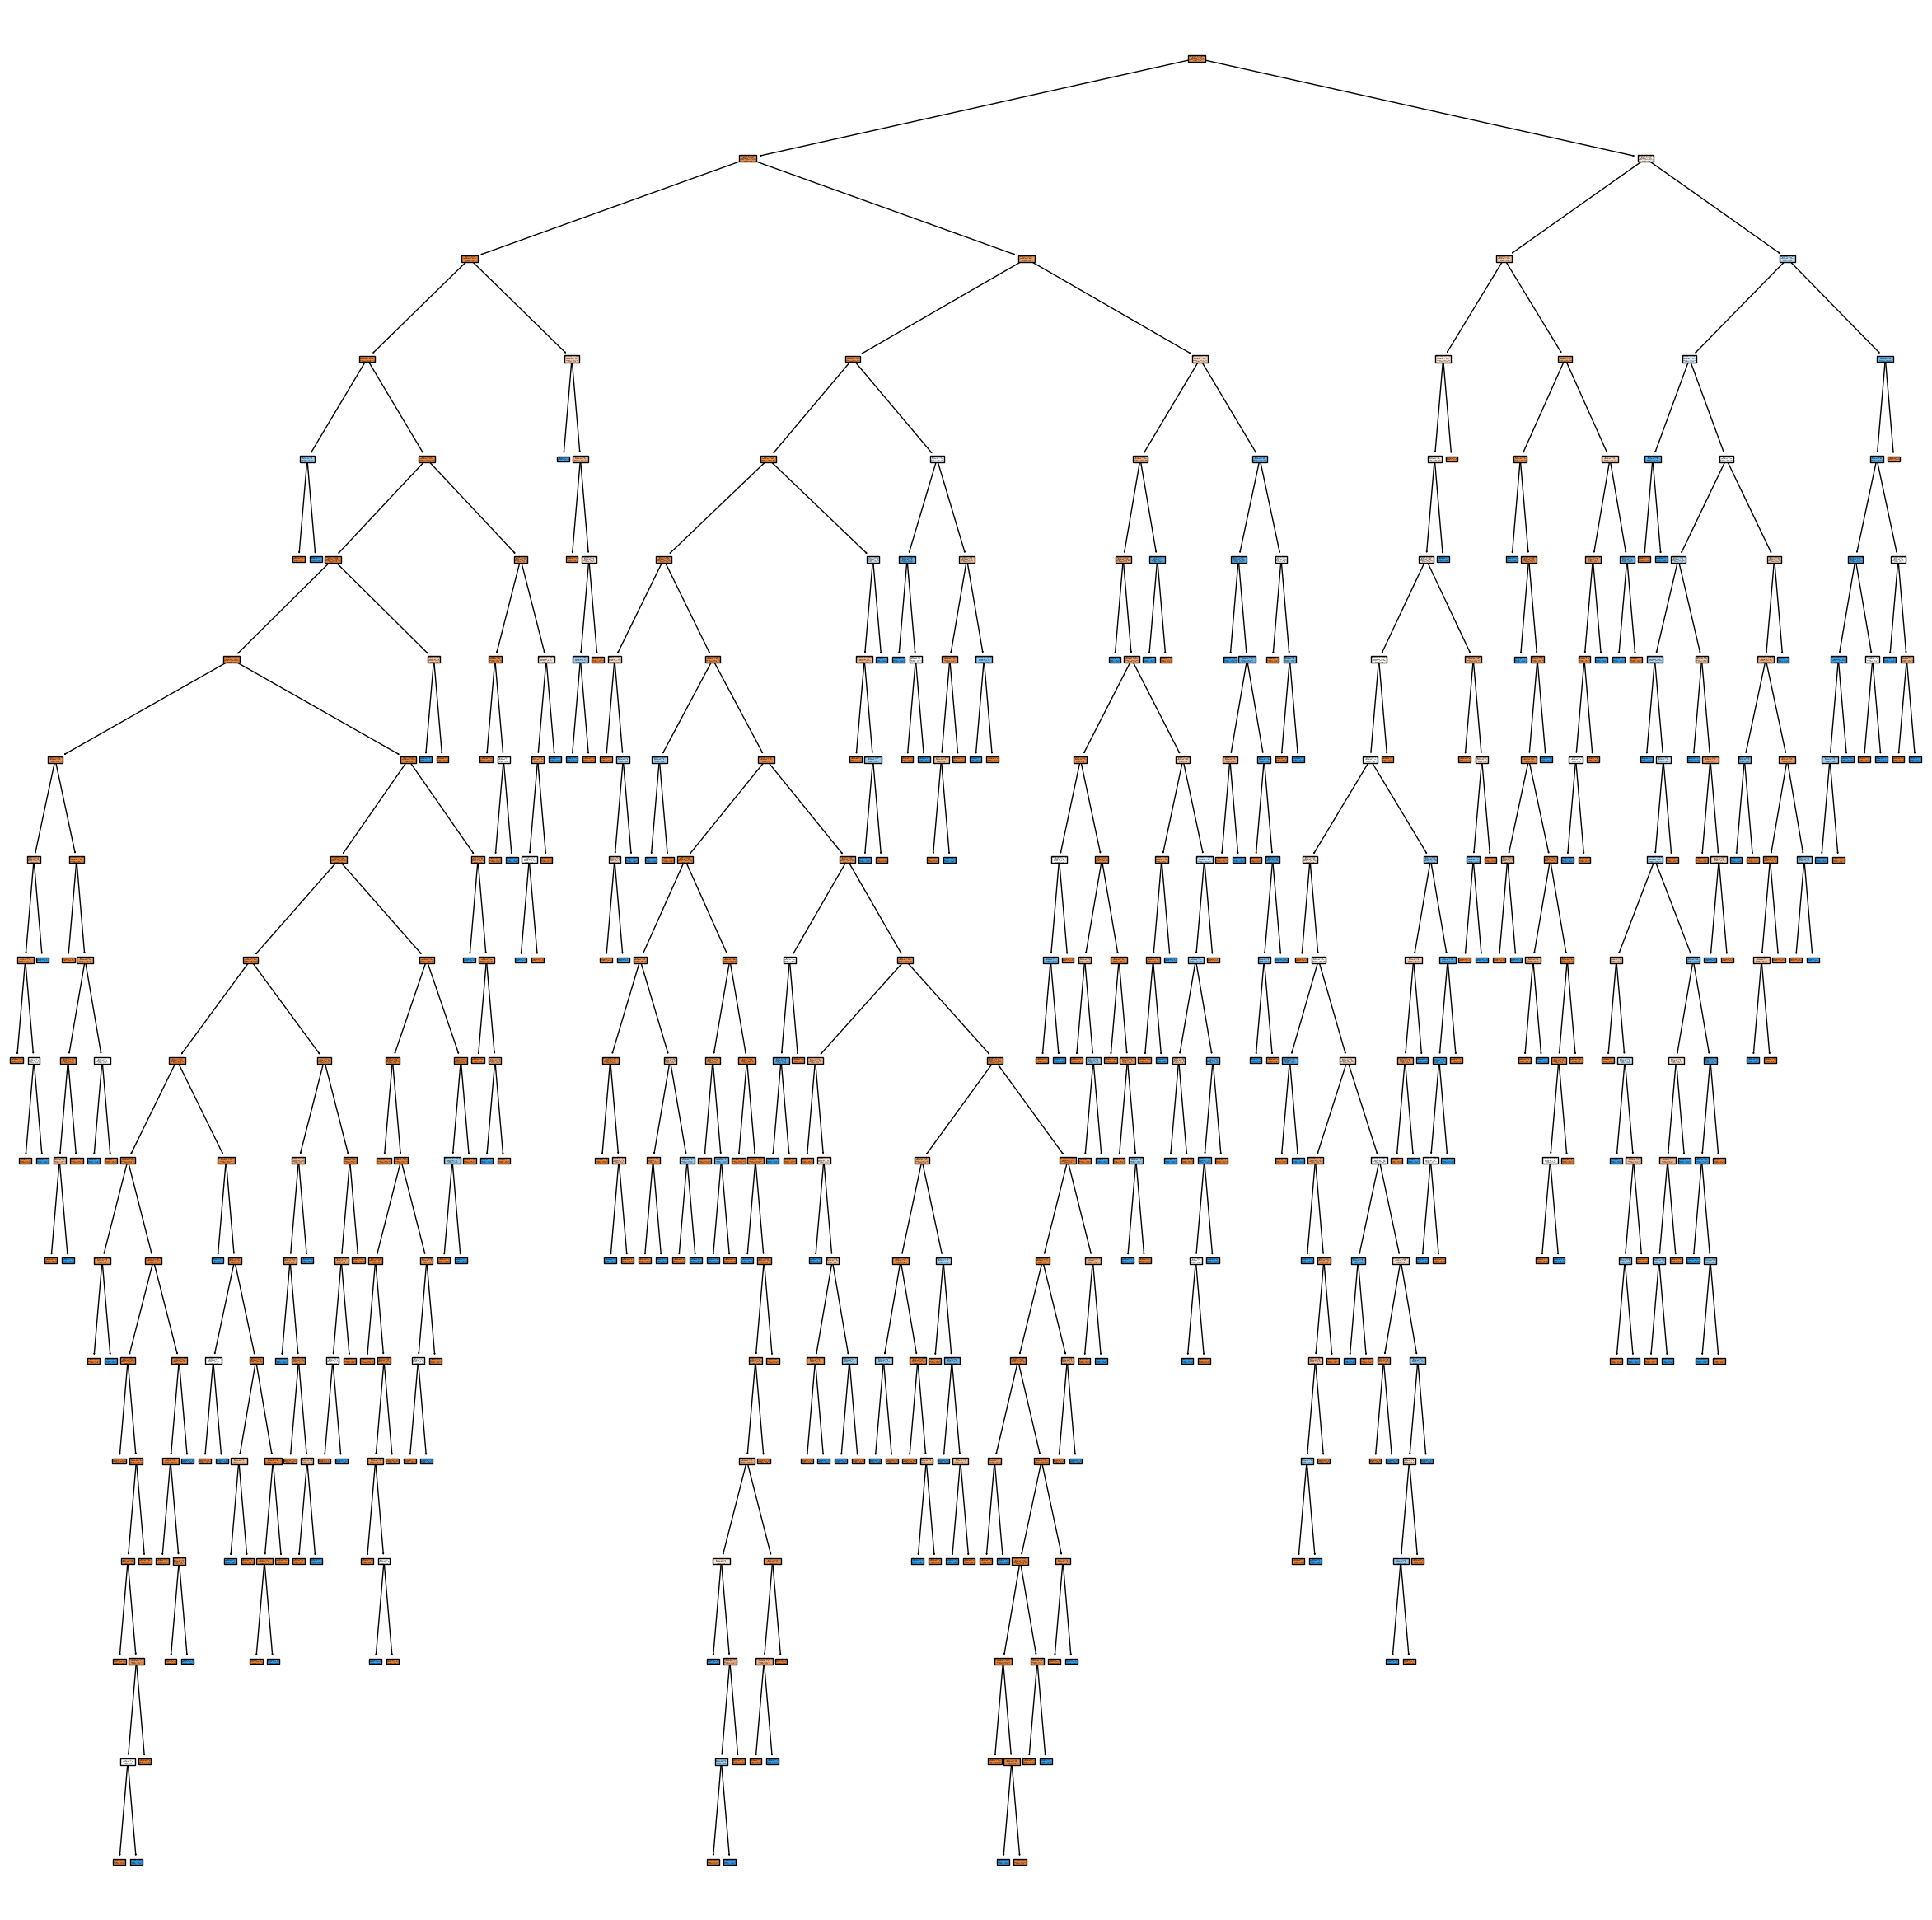

In [43]:
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()